In [ ]:
import finalfig as ff
import itertools
import numpy as np
import copy
import matplotlib.pyplot as plt
import tikzplotlib as tikz


num_workers = 4
max_n = 9
training_trials = 150
evaluation_trials = 7500
check = 50
vec_NN = []

def ind_rho_func(vec):
    rho0, rho1 = np.array([[0.85, 0],[0, 0.15]]), np.array([[0.15, 0], [0, 0.85]])
    rhoset = np.array([rho0, rho1])
    intvec = np.array(list(vec),dtype=int)
    return rhoset[intvec]  

def full_rho_func(n):
    binarr =  np.array(["".join(seq) for seq in itertools.product("01", repeat=n)])
    return np.array([ind_rho_func(binarr[_]) for _ in range(len(binarr)) ])

for j in range(2,9):
    print("Starting n = ",j,"out of",max_n)
    rho = full_rho_func(j)
    q = 1/(2**j)*np.ones(2**j) 
    d = np.full(j,2) 
    defaultconfig = {"rho": copy.copy(rho), "q": copy.copy(q),  
                 "quantization" : 20, "d" : d, "separable": True}
    vec_NN.append(ff.single_test(defaultconfig, training_trials, evaluation_trials, check, num_workers = num_workers))
    np.save('vec_NN_fig2', vec_NN)   

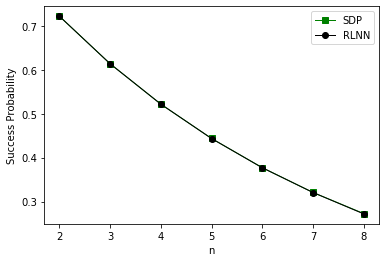

In [4]:
collective = 0.85 ** np.arange(2,max_n)
X = np.arange(2,max_n)
plt.plot(X, collective, marker = "s", color = 'green', linewidth = 1, label = 'SDP')
plt.plot(X, vec_NN, color = 'black', marker = 'o', linewidth = 1, label = 'RLNN')
plt.xlabel('n')
plt.ylabel('Success Probability')
plt.legend(loc="upper right")
tikz.save("Fig3")
plt.show()